In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/daoxuanbac/Downloads/ADY201m-PRJ/DataHouseRaw.csv')
df

,Mã BĐS,Địa chỉ,Diện tích,Phòng ngủ,Phòng tắm,Pháp lý,Ngày đăng,Giá nhà
0,22021853,"Lê Văn Sỹ, Phường 1, Quận Tân Bình, TPHCM",72 m2,3,3,Sổ hồng,20/03/2023,1 tỷ 510 triệu
1,22057237,"Khương Đình, Phường Khương Đình, Quận Thanh X...",35 m2,1,1,Sổ đỏ,20/03/2023,550 triệu
2,22057293,"Xuân Đỉnh, Phường Xuân Đỉnh, Quận Bắc Từ Liêm...",35 m2,1,1,Sổ đỏ,20/03/2023,595 triệu
3,22057245,"Võng Thị, Phường Bưởi, Quận Tây Hồ, Hà Nội",35 m2,1,1,Sổ đỏ,20/03/2023,590 triệu
4,21994903,"Trích Sài, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",36 m2,1,1,Sổ hồng,20/03/2023,680 triệu
...,...,...,...,...,...,...,...,...
7435,21543455,"Nguyễn Văn Linh, Phường Tân Phong, Quận 7, TPHCM",120 m2,3,2,Sổ hồng,17/03/2023,20 triệu
7436,22045401,"Tân Hòa Đông, Phường 13, Quận 6, TPHCM",62 m2,2,2,Sổ hồng,17/03/2023,1 tỷ 995 triệu
7437,22045485,"Hậu Giang, Phường 11, Quận 6, TPHCM",86 m2,2,2,Sổ hồng,17/03/2023,2 tỷ 355 triệu
7438,22045505,"Phan Văn Khỏe, Phường 2, Quận 6, TPHCM",82 m2,2,2,Sổ hồng,17/03/2023,2 tỷ 20 triệu


In [3]:
#Kiểm tra Null/Nan Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mã BĐS     7440 non-null   int64 
 1   Địa chỉ    7440 non-null   object
 2   Diện tích  7440 non-null   object
 3   Phòng ngủ  7440 non-null   int64 
 4   Phòng tắm  7440 non-null   int64 
 5   Pháp lý    7440 non-null   object
 6   Ngày đăng  7440 non-null   object
 7   Giá nhà    7440 non-null   object
dtypes: int64(3), object(5)
memory usage: 465.1+ KB


In [4]:
#Mô tả giá trị dataframe
df.describe()

,Mã BĐS,Phòng ngủ,Phòng tắm
count,7.440000e+03,7440.000000,7440.000000
mean,2.189527e+07,2.166801,1.880242
std,2.399065e+05,0.800591,0.658355
min,2.042251e+07,1.000000,1.000000
25%,2.187733e+07,2.000000,2.000000
50%,2.199620e+07,2.000000,2.000000
75%,2.202872e+07,2.000000,2.000000
max,2.206975e+07,33.000000,26.000000


In [5]:
#Xóa những hàng trùng lặp
df = df.drop_duplicates()

In [6]:
#Convert diện tích
df['Diện tích'] = df['Diện tích'].str.replace(' m2','')
df['Diện tích'] = df['Diện tích'].str.replace(',','.')
df['Diện tích'] = df['Diện tích'].astype(float)

#Convert giá nhà
def convert_price(price: str):
    s = price.split(); n = len(s)
    if n == 2:
        if s[1] == "tỷ": price = int(s[0]) * 1000000000
        elif s[1] == "triệu": price = int(s[0]) * 1000000
        else: price = s[0]
    elif n == 4:
        if s[1] == "tỷ": price = int(s[0]) * 1000000000 + int(s[2]) * 1000000
        elif s[1] == "triệu": price = int(s[0]) * 1000000 + int(s[2]) * 1000
    return price
df['Giá nhà'] = df['Giá nhà'].map(convert_price)

#Convert pháp lý
def convert_phaply(s: str):
    if s == "Không xác định": s = 0
    elif s == "Sổ đỏ": s = 1
    elif s == "Sổ hồng": s = 2
    elif s == "Giấy tờ hợp lệ": s = 3
    elif s == "Hợp đồng mua bán": s = 4
    elif s == "Giấy tờ viết tay": s = 5
    return int(s)
df["Pháp lý"] = df["Pháp lý"].map(convert_phaply)

In [7]:
#Dữ liệu sau xử lý
df

,Mã BĐS,Địa chỉ,Diện tích,Phòng ngủ,Phòng tắm,Pháp lý,Ngày đăng,Giá nhà
0,22021853,"Lê Văn Sỹ, Phường 1, Quận Tân Bình, TPHCM",72.0,3,3,2,20/03/2023,1510000000
1,22057237,"Khương Đình, Phường Khương Đình, Quận Thanh X...",35.0,1,1,1,20/03/2023,550000000
2,22057293,"Xuân Đỉnh, Phường Xuân Đỉnh, Quận Bắc Từ Liêm...",35.0,1,1,1,20/03/2023,595000000
3,22057245,"Võng Thị, Phường Bưởi, Quận Tây Hồ, Hà Nội",35.0,1,1,1,20/03/2023,590000000
4,21994903,"Trích Sài, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",36.0,1,1,2,20/03/2023,680000000
...,...,...,...,...,...,...,...,...
7435,21543455,"Nguyễn Văn Linh, Phường Tân Phong, Quận 7, TPHCM",120.0,3,2,2,17/03/2023,20000000
7436,22045401,"Tân Hòa Đông, Phường 13, Quận 6, TPHCM",62.0,2,2,2,17/03/2023,1995000000
7437,22045485,"Hậu Giang, Phường 11, Quận 6, TPHCM",86.0,2,2,2,17/03/2023,2355000000
7438,22045505,"Phan Văn Khỏe, Phường 2, Quận 6, TPHCM",82.0,2,2,2,17/03/2023,2020000000


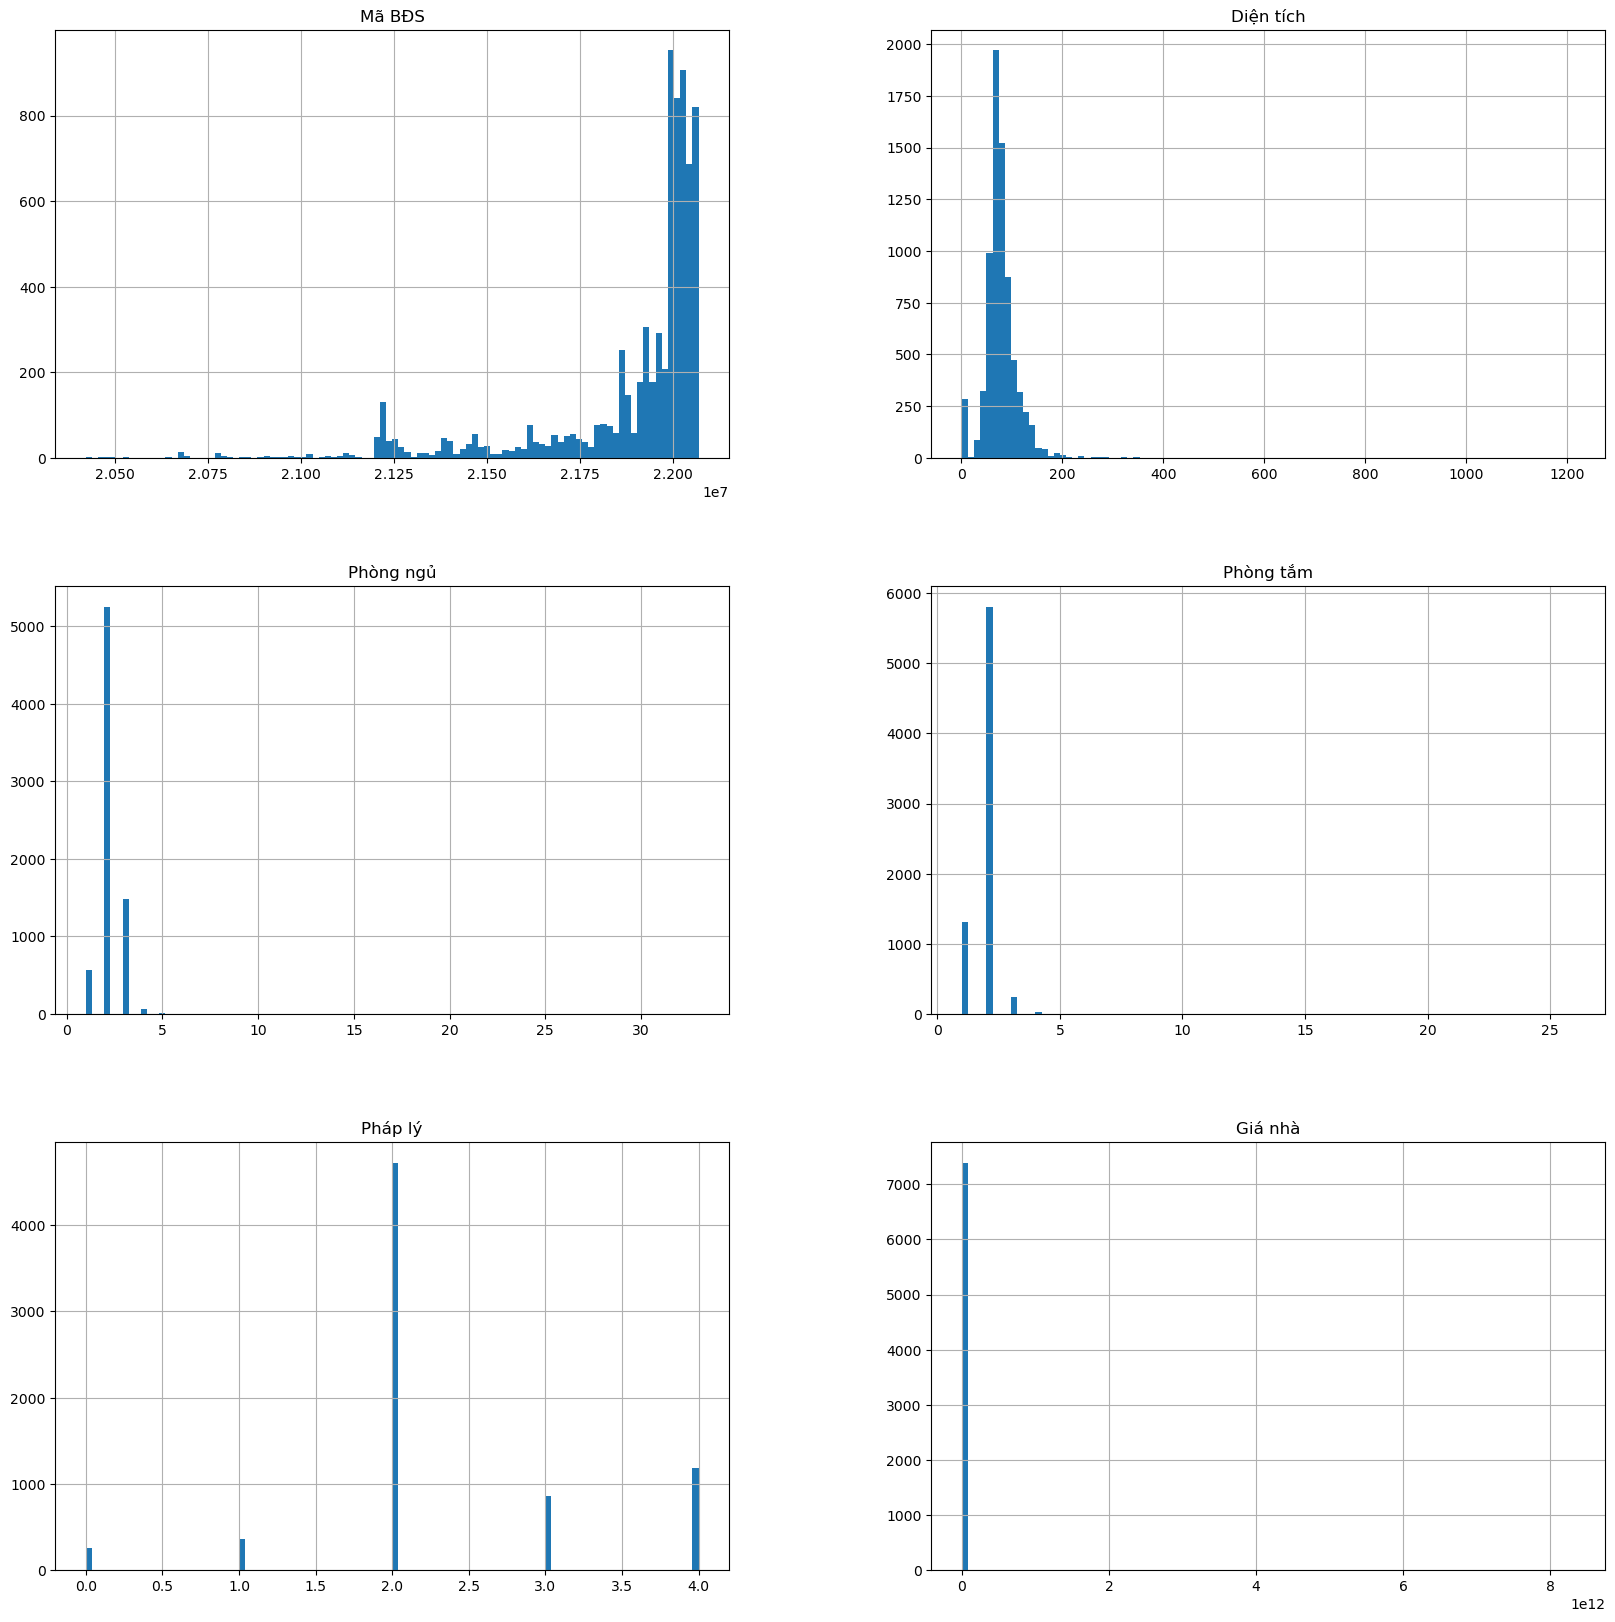

In [8]:
#Histogram
df.hist(figsize = (20,20), bins = 100);

In [9]:
df = df[df['Giá nhà'] < 20000000000]
df = df[df['Phòng ngủ'] < 8]
df = df[df['Phòng tắm'] < 8]
df = df[df['Diện tích'] < 200]
df = df[df['Diện tích'] > 20]

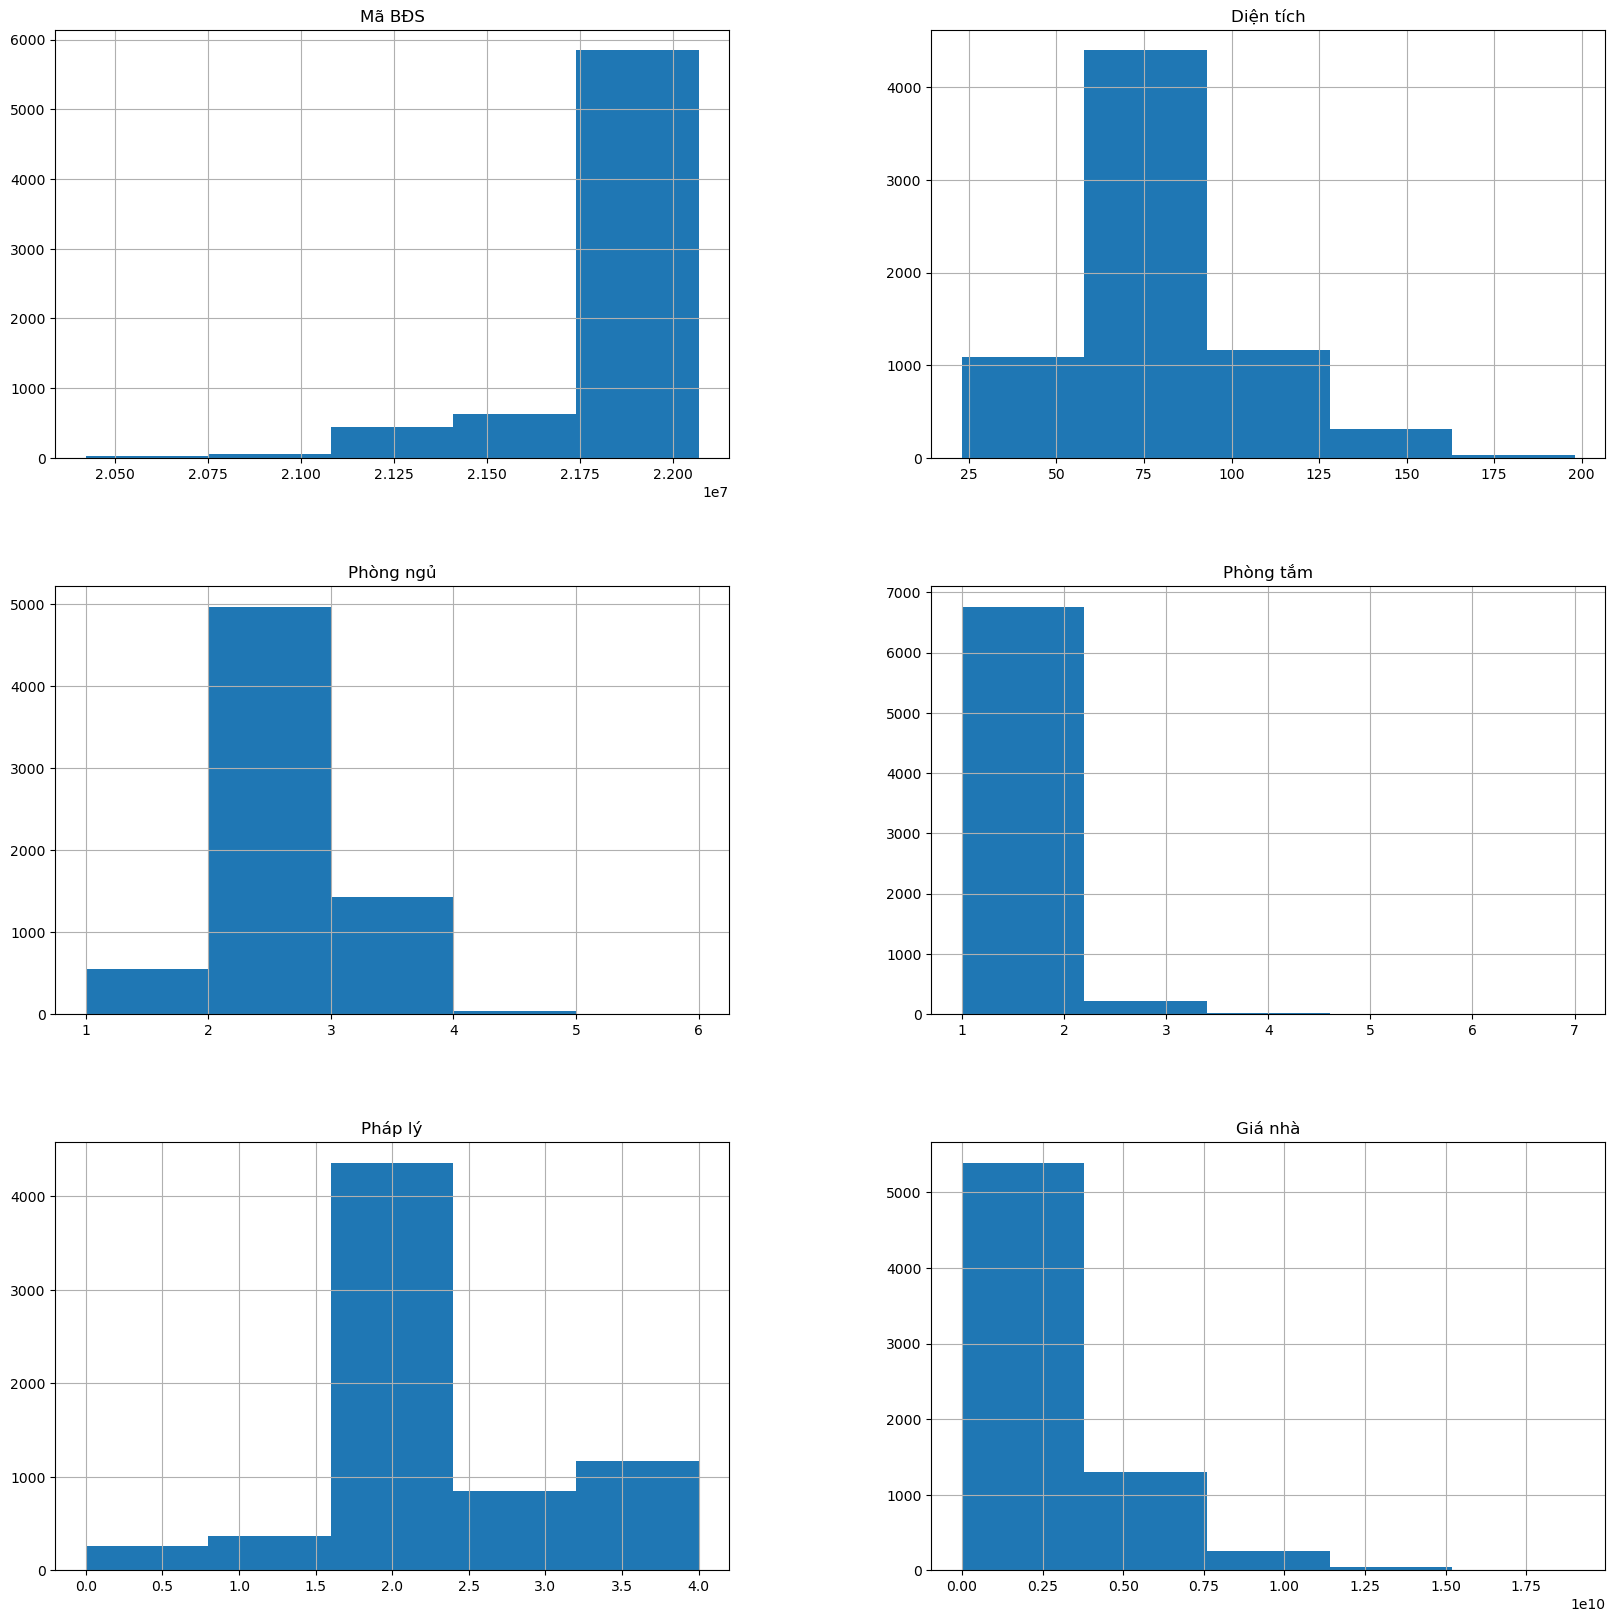

In [10]:
df.hist(figsize = (20,20), bins = 5);

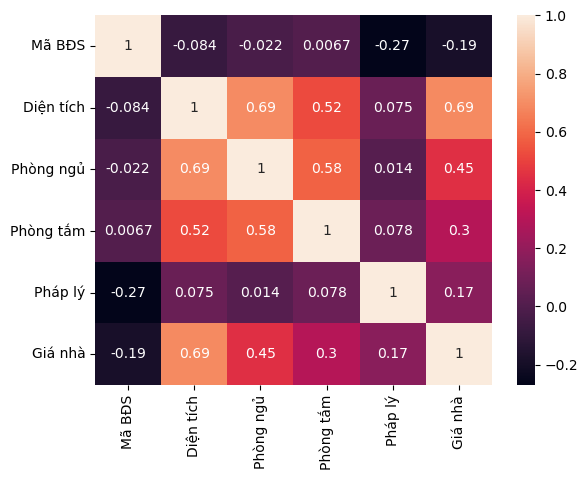

In [11]:
#Heatmap
sns.heatmap(df.corr(), annot = True);

In [13]:
df.to_csv('/Users/daoxuanbac/Downloads/ADY201m-PRJ/DataHouseClean.csv')